#**Simple Linear Regression**

##**Import libraries and Download Fuel Consumption Data**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

!wget -O FuelConsumption.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv


--2021-08-20 03:15:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2021-08-20 03:15:38 (1.90 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



##**Understanding Fuel Consumption Data**

In [ ]:
df = pd.read_csv('FuelConsumption.csv')
print(df.info)
print(df.dtypes)
print(df.head())
print(df.describe())

<bound method DataFrame.info of       MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0          2014  ACURA  ...                       33          196
1          2014  ACURA  ...                       29          221
2          2014  ACURA  ...                       48          136
3          2014  ACURA  ...                       25          255
4          2014  ACURA  ...                       27          244
...         ...    ...  ...                      ...          ...
1062       2014  VOLVO  ...                       24          271
1063       2014  VOLVO  ...                       25          264
1064       2014  VOLVO  ...                       24          271
1065       2014  VOLVO  ...                       25          260
1066       2014  VOLVO  ...                       22          294

[1067 rows x 13 columns]>
MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGIN

In [ ]:
specified_data = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
specified_data.head()

,CYLINDERS,ENGINESIZE,CO2EMISSIONS,FUELCONSUMPTION_COMB
0,4,2.0,196,8.5
1,4,2.4,221,9.6
2,4,1.5,136,5.9
3,6,3.5,255,11.1
4,6,3.5,244,10.6


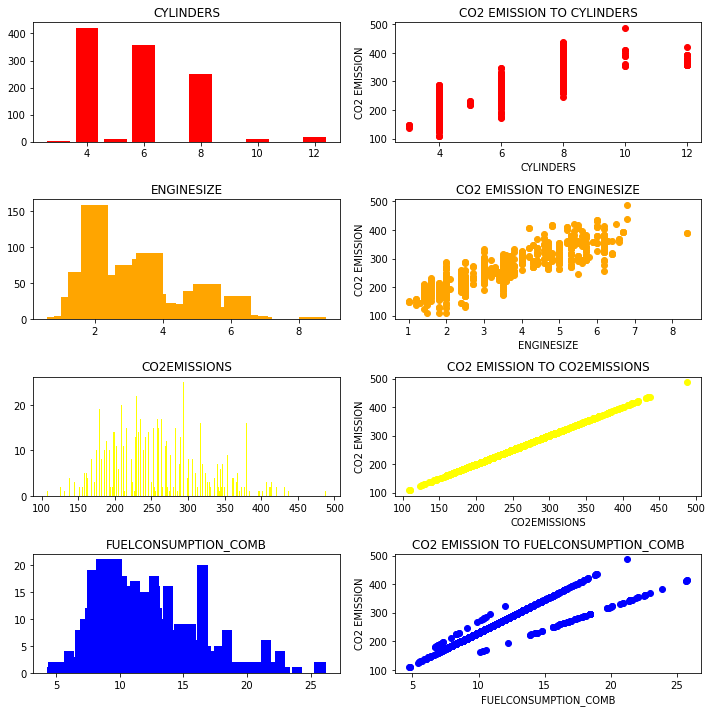

In [ ]:
cols_name = specified_data.columns
color = ['red', 'orange', 'yellow', 'blue']
fig, ax = plt.subplots(4, 2, figsize=(10,10), tight_layout=3.0)
for index, cols in enumerate(cols_name):
  counter = dict(specified_data[cols].value_counts())
  ax[index][0].bar(list(counter.keys()),list(counter.values()), color=color[index])
  ax[index][0].set_title(cols)
  ax[index][1].scatter(specified_data[cols], specified_data.CO2EMISSIONS, color=color[index])
  ax[index][1].set_title('CO2 EMISSION TO ' + cols)
  ax[index][1].set_xlabel(cols)
  ax[index][1].set_ylabel('CO2 EMISSION')
  

##**Create train and test dataset**

In [ ]:
split = np.random.rand(len(df)) < 0.8
train_data = df[split]
test_data = df[~split]

##**Simple Regression Model**

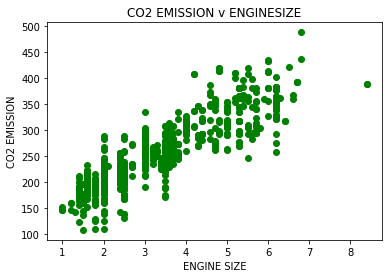

In [ ]:
# View the distribution of training data
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='green')
plt.title('CO2 EMISSION v ENGINESIZE')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.show()

In [ ]:
# Model training
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
train_x = np.asanyarray(train_data[['ENGINESIZE']])
train_y = np.asanyarray(train_data[['CO2EMISSIONS']])
regression_model.fit(train_x, train_y)

print('Coefficient: {}'.format(regression_model.coef_))
print('Intercept: {}'.format(regression_model.intercept_))

Coefficient: [[39.37519375]]
Intercept: [124.01086813]


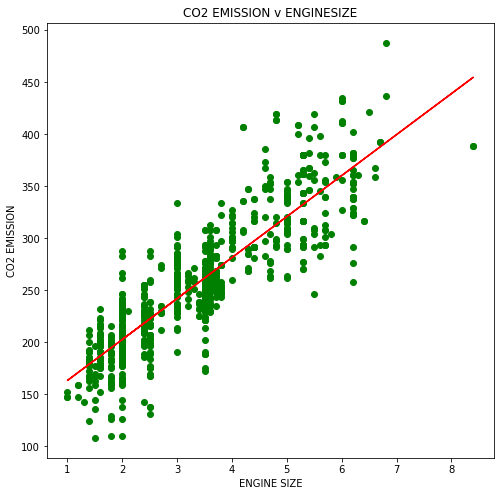

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='green')
plt.plot(train_x, regression_model.coef_[0][0]*train_x + regression_model.intercept_[0], '-r')
plt.title('CO2 EMISSION v ENGINESIZE')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.show()

##**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])

y_predict = regression_model.predict(test_x)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(y_predict - test_y)))
print('Mean Squared Error: %.2f' % np.mean((y_predict - test_y)**2))
print('R-Squared: %.2f' % r2_score(test_y, y_predict))

Mean Absolute Error: 22.93
Mean Squared Error: 886.60
R-Squared: 0.76


#**Multiple Linear Regression**

In [ ]:
df = pd.read_csv('FuelConsumption.csv')
customized_df = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
customized_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


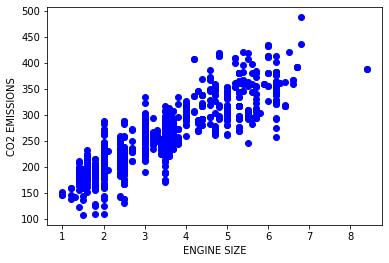

In [ ]:
plt.scatter(customized_df[['ENGINESIZE']], customized_df[['CO2EMISSIONS']], color='blue')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

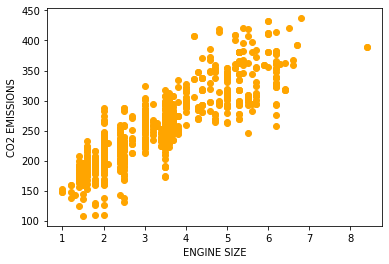

In [ ]:
split = np.random.rand(len(df)) < 0.8

train_data = df[split]
test_data = df[~split]

plt.scatter(train_data[['ENGINESIZE']], train_data[['CO2EMISSIONS']], color='orange')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSIONS')
plt.show()

In [ ]:
#  Model training
mult_regression_model = LinearRegression()
train_X = np.asanyarray(train_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']] )
train_Y = np.asanyarray(train_data[['CO2EMISSIONS']])

mult_regression_model.fit(train_X , train_Y)
print('Coefficient: {}'.format(mult_regression_model.coef_))
print('Intercept: {}'.format(mult_regression_model.intercept_))

Coefficient: [[9.65868637 7.84956857 9.95508878]]
Intercept: [63.29307745]


In [ ]:
y_predict= mult_regression_model.predict(test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test_data[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_predict - y) ** 2))
print('Variance score: %.2f' % mult_regression_model.score(x, y))

Residual sum of squares: 584.42
Variance score: 0.86


Try to use a multiple linear regression with the same dataset, but this time use __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [ ]:
mult_regression_model = LinearRegression()
train_X = np.asanyarray(train_data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']] )
train_Y = np.asanyarray(train_data[['CO2EMISSIONS']])

mult_regression_model.fit(train_X , train_Y)
print('Coefficient: {}'.format(mult_regression_model.coef_))
print('Intercept: {}'.format(mult_regression_model.intercept_))

y_predict= mult_regression_model.predict(test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
x = np.asanyarray(test_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY']])
y = np.asanyarray(test_data[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_predict - y) ** 2))
print('Variance score: %.2f' % mult_regression_model.score(x, y))

Coefficient: [[9.71898538 7.71314285 4.02721115 5.80586539]]
Intercept: [63.81487195]
Residual sum of squares: 581.46
Variance score: 0.86


#**Polynomial Regression**
- Polynomial regression is a special case of linear regression, with the main idea of how do you select your features

In [ ]:
df = pd.read_csv('FuelConsumption.csv')
print(df.head())

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


   ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB  CO2EMISSIONS
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244


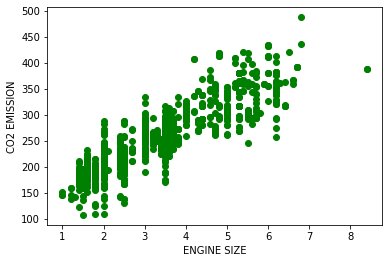

In [ ]:
poly_df = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
print(poly_df.head())

plt.scatter(poly_df.ENGINESIZE, poly_df.CO2EMISSIONS, color='green')
plt.xlabel('ENGINE SIZE')
plt.ylabel('CO2 EMISSION')
plt.show()

In [ ]:
split = np.random.rand(len(df)) < 0.8 
train_data = poly_df[split]
test_data = poly_df[~split]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

train_x = np.asanyarray(train_data[['ENGINESIZE']])
train_y = np.asanyarray(train_data[['CO2EMISSIONS']])

test_x = np.asanyarray(test_data[['ENGINESIZE']])
test_y = np.asanyarray(test_data[['CO2EMISSIONS']])

# fit_transform takes our x values, and output a list of our 
# data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly 

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  1.5 ,  2.25],
       ...,
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

In [ ]:
regression_model_pol = LinearRegression()
regression_model_pol.fit(train_x_poly, train_y)

print('Coefficient: {}'.format(regression_model_pol.coef_))
print('Intercept: {}'.format(regression_model_pol.intercept_))


Coefficient: [[ 0.         51.80319465 -1.71776434]]
Intercept: [104.89325532]


Text(0.5, 0, 'CO2 EMISSIONS')

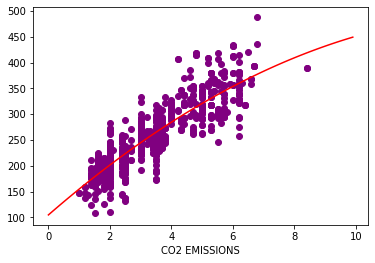

In [ ]:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='purple')
XX = np.arange(0.0, 10.0, 0.1)
YY = regression_model_pol.intercept_[0] + regression_model_pol.coef_[0][1]*XX + regression_model_pol.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, YY, '-r')
plt.xlabel('ENGINE SIZE')
plt.xlabel('CO2 EMISSIONS')


In [ ]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
y_predict = regression_model_pol.predict(test_x_poly)


print('Mean Absolute Error: %.2f' % np.mean(np.absolute(y_predict - test_y)))
print('Mean Squared Error: %.2f' % np.mean((y_predict - test_y)**2))
print('R-Squared: %.2f' % r2_score(test_y, y_predict))

Mean Absolute Error: 22.65
Mean Squared Error: 843.94
R-Squared: 0.77


Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

In [ ]:
poly = PolynomialFeatures(degree=3)
train_x_poly_cubic = poly.fit_transform(train_x)

regression_model_pol_cubic = LinearRegression()
regression_model_pol_cubic.fit(train_x_poly_cubic, train_y)

print('Coefficient: {}'.format(regression_model_pol.coef_))
print('Intercept: {}'.format(regression_model_pol.intercept_))


Coefficient: [[ 0.         51.80319465 -1.71776434]]
Intercept: [104.89325532]


Text(0.5, 0, 'CO2 EMISSIONS')

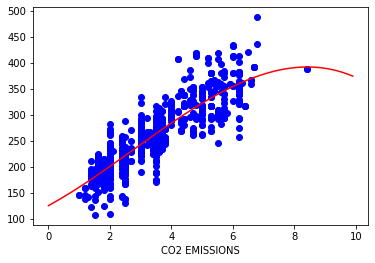

In [ ]:
plt.scatter(train_data.ENGINESIZE, train_data.CO2EMISSIONS, color='blue')
XX = np.arange(0.0, 10.0, 0.1)
YY = regression_model_pol_cubic.intercept_[0] + regression_model_pol_cubic.coef_[0][1]*XX + regression_model_pol_cubic.coef_[0][2]*np.power(XX, 2) +  regression_model_pol_cubic.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, YY, '-r')
plt.xlabel('ENGINE SIZE')
plt.xlabel('CO2 EMISSIONS')

In [ ]:
test_x_poly_cubic = poly.fit_transform(test_x)
y_predict = regression_model_pol_cubic.predict(test_x_poly_cubic)

print('Mean Absolute Error: %.2f' % np.mean(np.absolute(y_predict - test_y)))
print('Mean Squared Error: %.2f' % np.mean((y_predict - test_y)**2))
print('R-Squared: %.2f' % r2_score(test_y, y_predict))

Mean Absolute Error: 22.58
Mean Squared Error: 838.07
R-Squared: 0.77
